In [ ]:
# Importing necessary libraries for use

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,f1_score,accuracy_score,precision_score
from sklearn.preprocessing import LabelEncoder


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Mounting my own google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the dataset

df = pd.read_csv('/content/drive/MyDrive/IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Initialising the stopwords list and the Porter Stemmer for further use

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Text preprocessing function for text column

def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove non-alphabetical characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    # Tokenize and remove stop words
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Applying the preprocessing function to the text column

df['review'] = df['review'].apply(preprocess_text)
df.head()

,review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [ ]:
# Feature extraction using TF-IDF Vectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['review']).toarray()

# Apply the label encoding for the sentiment target column

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

In [ ]:
# Train Test Split on the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)




Classification Report for Logistic Regression : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4813
           1       0.90      0.88      0.89      5187

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy : 88.58 %



<Figure size 800x600 with 0 Axes>

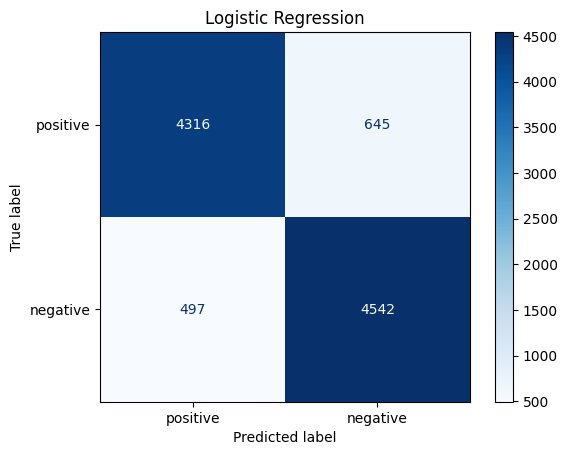




Classification Report for Linear Support Vector Machines : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4843
           1       0.89      0.87      0.88      5157

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy : 88.14 %



<Figure size 800x600 with 0 Axes>

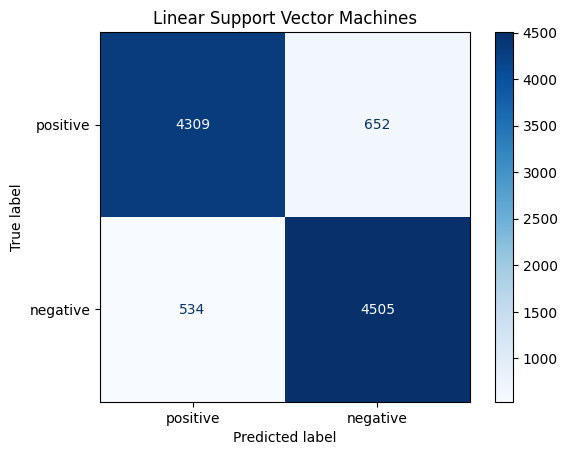




Classification Report for Multinomial Naive Bayes : 
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4886
           1       0.86      0.85      0.85      5114

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Accuracy : 85.07 %



<Figure size 800x600 with 0 Axes>

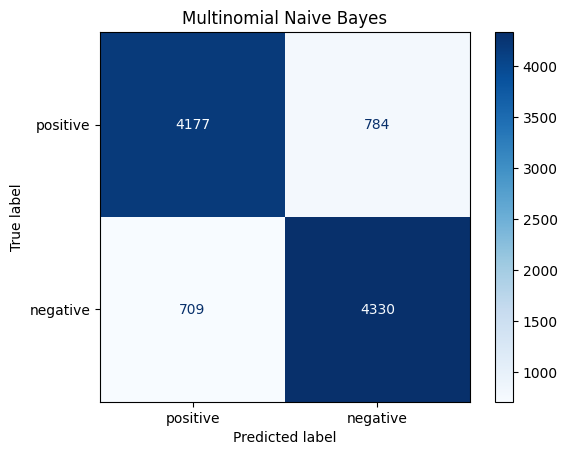

In [ ]:
# Training and evaluating the most apt models to select the best one out of them

analysis_data = []

m1 = LogisticRegression()
m2 = LinearSVC()
m3 = MultinomialNB()

models = {
    'Logistic Regression' : m1,
    'Linear Support Vector Machines': m2,
    'Multinomial Naive Bayes' : m3
}

for model_name in models:
  model = models[model_name]
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  print("\n\n")
  print(f"Classification Report for {model_name} : \n{classification_report(pred,y_test)}\nAccuracy : {round(accuracy_score(pred,y_test)*100,2)} %\n")
  analysis_data.append([model_name,round(accuracy_score(pred,y_test)*100,2),round(precision_score(pred,y_test)*100,2),round(f1_score(pred,y_test)*100,2)])

  # Confusion Matrix for checking classification efficacy

  plt.figure(figsize = (8,6))
  disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels = df['sentiment'].unique(),
        cmap=plt.cm.Blues
  )
  plt.title(model_name)
  plt.show()

In [ ]:
# Model Metrics Summary

display(pd.DataFrame(list(sorted(analysis_data,reverse=True,key = lambda x: x[1])),columns=["Model","Accuracy(%)","Precision(%)","F1-Score(%)"]))

,Model,Accuracy(%),Precision(%),F1-Score(%)
0,Logistic Regression,88.58,90.14,88.83
1,Linear Support Vector Machines,88.14,89.40,88.37
2,Multinomial Naive Bayes,85.07,85.93,85.29


In [25]:
# Best model (Linear Regression) used to demonstrate the use on a sample input

sample_data = ["""
                 No one expects the Star Trek movies to be high art, but the fans do expect a movie that is as good as some of the best episodes.
                 Unfortunately, this movie had a muddled, implausible plot that just left me cringing - this is by far the worst of the nine (so far) movies.
                 Even the chance to watch the well known characters interact in another movie can't save this movie - including the goofy scenes with Kirk, Spock and McCoy at Yosemite.<br /><br />
                 I would say this movie is not worth a rental, and hardly worth watching, however for the True Fan who needs to see all the movies,
                 renting this movie is about the only way you'll see it - even the cable channels avoid this movie.
              """]

def predict(movie_review):
  test_matrix = vectorizer.transform(movie_review)
  result = model.predict(test_matrix)
  return result

sample_data[0] = preprocess_text(sample_data[0])

predicted_label = predict(sample_data)

if(predicted_label == 1):
  ans = 'Positive'
else:
  ans = 'Negative'

print('Predicted Sentiment for the Sample Input:',ans)

Predicted Sentiment for the Sample Input: Negative


**Conclusion**

Hence the model for sentiment analysis is developed using Linear Regression as ML technique and TF-IDF Vectorizer for feature extraction.